In [84]:
# Import all required packages

from qutip import *
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image #To show Image

Text(5, -0.4, '$n_3$ = 1.0 \n$n_4$ = 1.0 \nentangled = No')

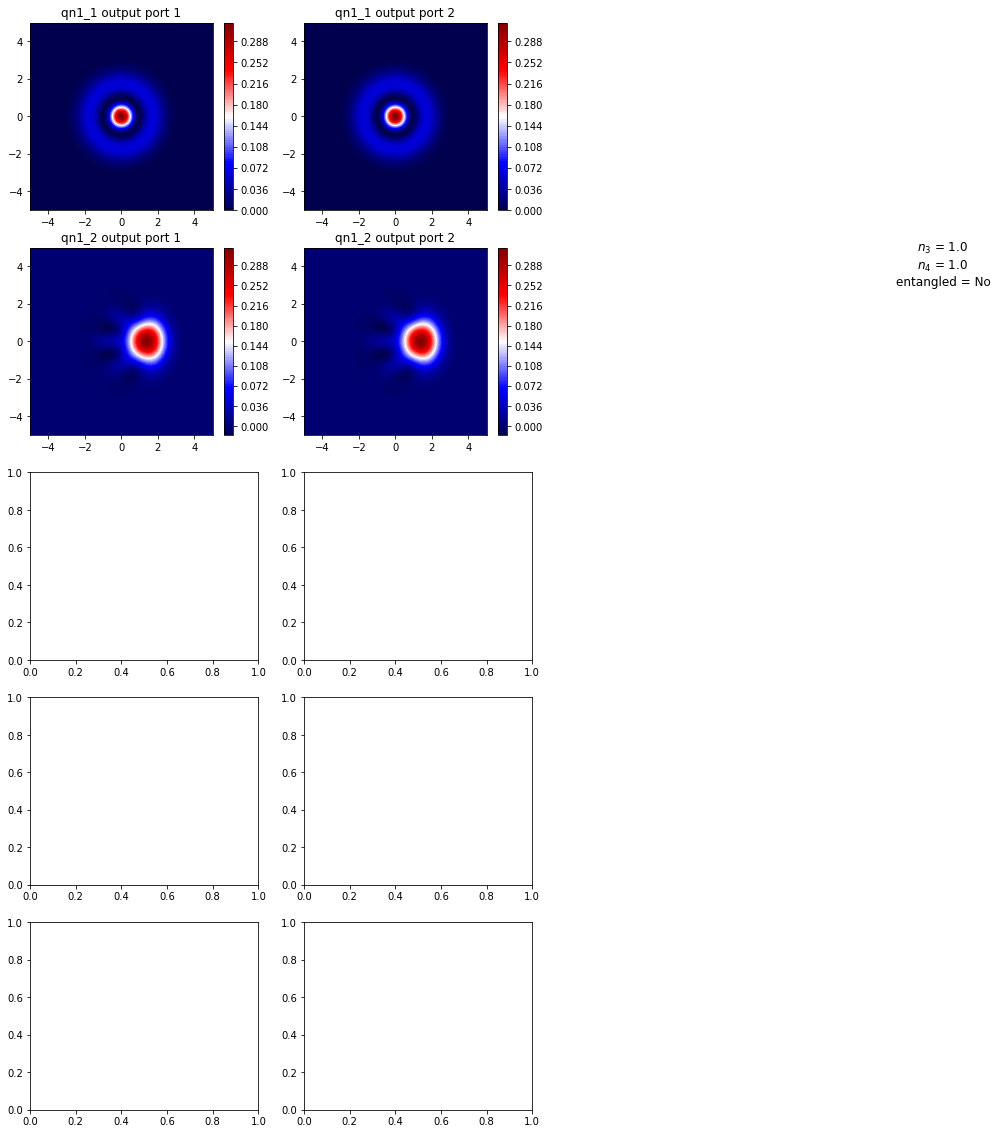

In [133]:
# Initialize the states
N = 5 # Levels in the Hilbert space

a = destroy(N)
n_oper_3 = tensor(a.dag()*a,qeye(N))
# n_oper_4 = tensor(qeye(N),a.dag()*a)
n_oper = a.dag()*a

psig = fock(N,0)
psi = tensor(psig,psig)

alpha = 2**0.5
alpha_neg = -alpha
s_a = 0.5
phi = 0
s_b = 0.5*np.exp(1j*phi)

################ Qn1_1 ################
c_3 = tensor(a.dag(),qeye(N))
c_4 = tensor(qeye(N),a.dag())
c_1 = (1/(2**0.5))*(c_3+c_4)
c_2 = (1/(2**0.5))*(c_3-c_4)

qn1_1 = c_1*c_2*psi
qn1_1_3 = qn1_1.ptrace(0)
qn1_1_4 = qn1_1.ptrace(1)

################ Qn1_2 ################
disp_3 = tensor(((1/2**0.5)*(alpha*a.dag()-alpha*a)).expm(),qeye(N))
disp_4 = tensor(qeye(N),((1/2**0.5)*(alpha*a.dag()-alpha*a)).expm())
disp_1 = (disp_3*disp_4)

# tensor(coherent(N,alpha/2**0.5),coherent(N,alpha/2**0.5)) == disp_a*psi
qn1_2 = disp_1*psi
qn1_2_3 = qn1_2.ptrace(0)
qn1_2_4 = qn1_2.ptrace(1)

################ Qn1_3 ################
disp_3_neg = tensor(((1/2**0.5)*(alpha*a.dag()-alpha*a)).expm().dag(),qeye(N))
disp_4_neg = tensor(qeye(N),((1/2**0.5)*(alpha*a.dag()-alpha*a)).expm().dag())
disp_1_neg = (disp_3_neg*disp_4_neg)

# disp_a*psi + disp_a_neg*psi == tensor(coherent(N,alpha/2**0.5),coherent(N,alpha/2**0.5)) + tensor(coherent(N,-alpha/2**0.5),coherent(N,-alpha/2**0.5))
qn1_3 = disp_1*psi + disp_1_neg*psi

################ Qn1_4 ################






# Initalize plot variables
xvec = np.linspace(-5,5,200)
yvec = xvec

# Calculate the wigner function for the states
W_qn1_1_3 = wigner(qn1_1_3, xvec, yvec)
W_qn1_1_4 = wigner(qn1_1_4, xvec, yvec)
W_qn1_2_3 = wigner(qn1_2_3, xvec, yvec)
W_qn1_2_4 = wigner(qn1_2_4, xvec, yvec)
W_qn1_3 = wigner(qn1_3, xvec, yvec)
# W_qn1_4 = wigner(qn1_4, xvec, yvec)

# create a plot for 3 figures
fig, axes = plt.subplots(5, 2, figsize=(9,20))
axes = axes.flatten()

# create contour plots using the results of the wigner func
# The colour distribution varies from that in the lecture notes as it is not normalized to -1 to 1
cont0 = axes[0].contourf(xvec, xvec, W_qn1_1_3, 100, cmap = 'seismic')
cont1 = axes[1].contourf(xvec, xvec, W_qn1_1_4, 100, cmap = 'seismic')
cont2 = axes[2].contourf(xvec, xvec, W_qn1_2_3, 100, cmap = 'seismic')
cont3 = axes[3].contourf(xvec, xvec, W_qn1_2_4, 100, cmap = 'seismic')

# add colorbar
cb0 = fig.colorbar(cont0,ax = axes[0])
cb1 = fig.colorbar(cont1,ax = axes[1])
cb2 = fig.colorbar(cont2,ax = axes[2])
cb3 = fig.colorbar(cont3,ax = axes[3])

# set the title for each plot
lbl0 = axes[0].set_title("qn1_1 output port 1")
lbl1 = axes[1].set_title("qn1_1 output port 2")
lbl2 = axes[2].set_title("qn1_2 output port 1")
lbl3 = axes[3].set_title("qn1_2 output port 2")

#add a text below plots
axes[0].text(5,-0.4, '$n_3$ = {} \n$n_4$ = {} \nentangled = No'.format(expect(n_oper,qn1_1_3),expect(n_oper,qn1_1_4)), 
             size=12, ha="center", transform=axes[0].transAxes)

In [111]:
s_a = 0.5*np.exp(1j*0)
phi = 0
s_b = 0.5*np.exp(1j*phi)


sqiz_c = tensor(((1/4)*((s_a.conj()+s_b.conj())*(a**2)-(s_a+s_b)*a.dag()**2)+(2*a*(s_a.conj()-s_b.conj()))+(2*a.dag()*(s_b-s_a))).expm(),qeye(N))

In [134]:
expect(n_oper_3,qn1_1)

1.0

In [137]:
c_3 = tensor(a.dag(),qeye(N))
c_4 = tensor(qeye(N),a.dag())
c_1 = (1/(2**0.5))*(c_3+c_4)
c_2 = (1/(2**0.5))*(c_3-c_4)

qn1_1 = c_1*c_2*psi
qn1_1 == tensor(fock(N,2),fock(N,0)) + tensor(fock(N,0),fock(N,2))

False

In [147]:
c_1*tensor(psig,psig) == (1/(2**0.5))*tensor(fock(N,1),fock(N,1))

False